

#      **Trabajo Nº 5. Estructurando proyecto DS lll **








Enlace a archivo guardado en drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Llamo a las librerias potenciales a utilizar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# ***Introducción***

# Contexto
La vivienda en la India varía desde los palacios de los antiguos maharajás hasta los modernos edificios de apartamentos en las grandes ciudades y las pequeñas cabañas en las aldeas remotas. Ha habido un enorme crecimiento en el sector de la vivienda de la India a medida que han aumentado los ingresos. La Iniciativa de Medición de Derechos Humanos encuentra que India está haciendo el 60,9% de lo que debería ser posible en su nivel de ingresos por el derecho a la vivienda.

El arrendamiento, también conocido como alquiler o alquiler, es un acuerdo en el que se realiza un pago por el uso temporal de un bien, servicio o propiedad de otra persona. Un contrato de arrendamiento bruto es cuando el inquilino paga una cantidad fija de alquiler y el propietario paga todos los cargos de la propiedad en los que incurre regularmente el propietario. El alquiler puede ser un ejemplo de la economía colaborativa.

# Contenido
En este conjunto de datos, tenemos información sobre casi 4700+ casas/apartamentos/pisos disponibles para alquiler con diferentes parámetros como BHK, alquiler, tamaño, cantidad de pisos, tipo de área, localidad del área, ciudad, estado de mobiliario, tipo de inquilino preferido, N. de Baños, Contacto o tipo de rentador.

# Objetivo.
Trataremos de comprender cuales son los tipos de variantes que son determinantes para el precio de la vivienda ofertada, podremos seccionarlos y poder diferenciar cuales son las cualidades que seccionan cada vivienda y cuales son las mas conveniente en cuando precio-calidad.


# Glosario de conjuntos de datos (por columnas)

- BHK : Número de Dormitorios, Salón, Cocina.
- Renta : Renta de las Casas/Apartamentos/Piso.
- Tamaño : Tamaño de las Casas/Apartamentos/Piso en Pies Cuadrados.
- Planta : Casas/Apartamentos/Pisos situados en los que Planta y Número Total de Plantas (Ejemplo: Planta de 2, 3 de 5, etc.)
- Tipo de área : Tamaño de las casas/apartamentos/pisos calculado en Superárea o Área alfombrada o Área construida.
- Zona Localidad : Localidad de las Casas/Apartamentos/Pisos.
- Ciudad : Ciudad donde se ubican las Casas/Apartamentos/Pisos.
- Estado de Amueblamiento : Estado de Amueblamiento de las Casas/Apartamentos/Piso, ya sea Amueblado o Semi-Amoblado o Sin Amueblar.
- Inquilino Preferido : Tipo de Inquilino Preferido por el Propietario o Agente.
- Baño : Número de Baños.
- Punto de contacto : ¿A quién debe contactar para obtener más información sobre las casas/apartamentos/pisos?



# ***Data Wrangling.***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data science- Datasets/House rent dataset/House_Rent_Dataset.csv',index_col=0,sep=';')
df.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(4746, 11)

In [ ]:
print(df.shape)
print(df.duplicated().sum())

tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})

display(tabela)
display(df.head())

(4746, 11)
8


,Unique,Null,NullPercent,Type
BHK,6,0,0.0,int64
Rent,243,0,0.0,int64
Size,615,0,0.0,int64
Floor,480,0,0.0,object
Area Type,3,0,0.0,object
Area Locality,2235,0,0.0,object
City,6,0,0.0,object
Furnishing Status,3,0,0.0,object
Tenant Preferred,3,0,0.0,object
Bathroom,8,0,0.0,int64


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Podemos visualizar 4746 filas y 11 columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 18/05/2022 to 04/05/2022
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 444.9+ KB


Podemos visualizar una tabla que indica el indice de numeros de columnas a la izquierda, nombre de todas la columnas en la seguna columna vertical, el numero de datos non-null y ademas el tipo de dato en la ultima columna de la derecha. Ademas en la parte final la memoria utilizada.

In [ ]:
Informacion_general = df.select_dtypes(include='O')

for i in cat:
    if df[i].nunique() < 10:
        print(df[i].value_counts())
        print()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64



Podewmos visualizar la cantidad de datos dentro de cada variable.

In [ ]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

Podemos visualizar las respectivas columnas del dataset.

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Podemos ver lista de de columnas correscpondientes. Donde vemos cantidad de valores no nulos, la media, la desviacion, el valor minimo, lo que hay debajo del 25%, 50%, 75% y ademas el numero maximo.

In [ ]:
columnas_nulos = df.columns[df.isnull().any()]
df[columnas_nulos].isnull().sum()

Series([], dtype: float64)

In [ ]:
df.isnull().any()

BHK                  False
Rent                 False
Size                 False
Floor                False
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom             False
Point of Contact     False
dtype: bool

In [ ]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

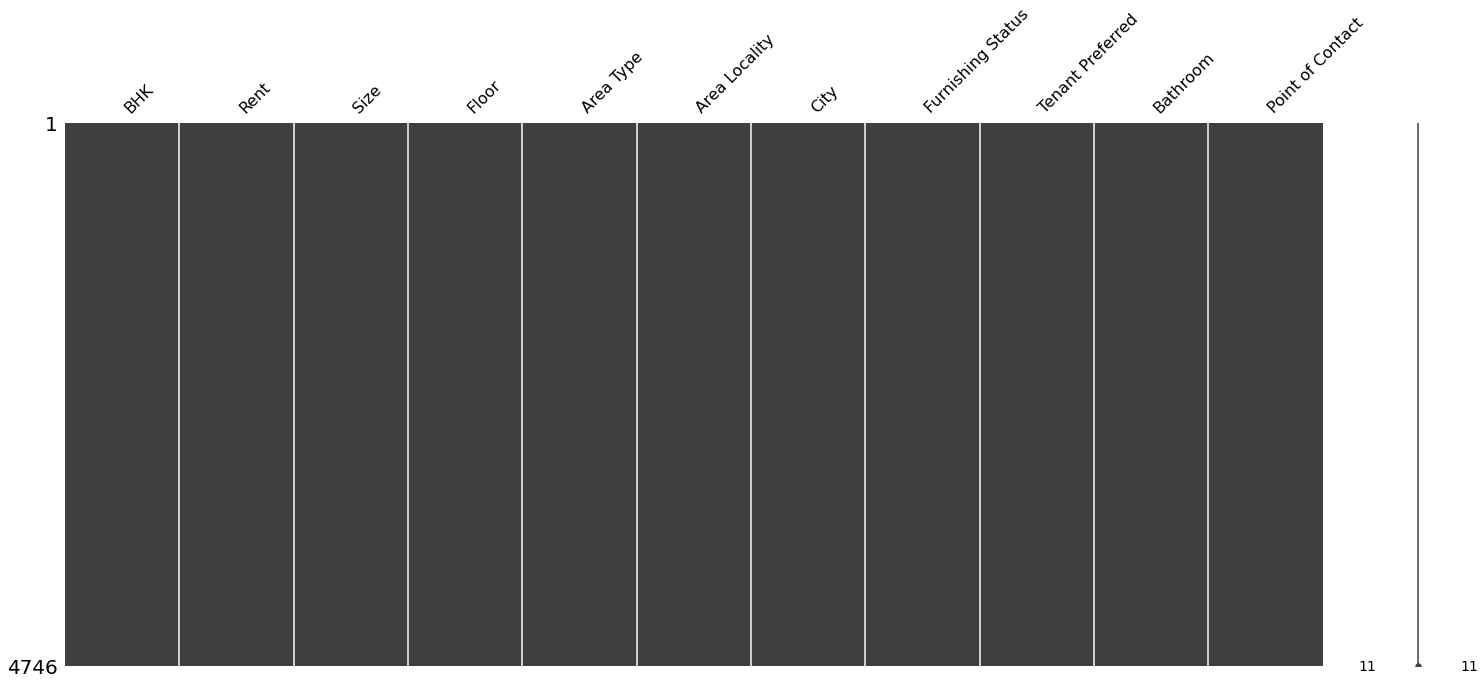

<Figure size 1080x648 with 0 Axes>

In [ ]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

Con diferentes metodos visualizamos que efectivamente no contamos con valores nulos o faltantes.

In [ ]:
df.City.unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

Me parecio interesante visualizar todas las ciudades con ofertas del Dataset.

# ***EDA - Exploratory Data Analysis 📊***

In [ ]:
df.shape

(4746, 11)

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


Analizaremos los atributos mas determinantes para poder entender,predecir y especular acerca de los precios de los mismos, asi podremos seccionarlos y entender las causas mas contundentes de los precios asentados para cada una de las ofertas de viviendas del Dataset.

# ***Serie de preguntas***

*   ¿La cantidad de oferta-demanda en una ciudad afecta el precio de las viviendas? 
*   ¿Qué tan variante para el precio la Zona/Ciudad en la que se encuentra?
*   ¿Qué tanto afecta el precio la cantidad de baños que posee una vivienda?
*   ¿Qué tanto afecta al precio el tamaño de la vivienda?
*   ¿El hecho del contacto de la vivienda sea dueño directo o inmobiliaria cambia el precio?

# ***Visualizaciones***

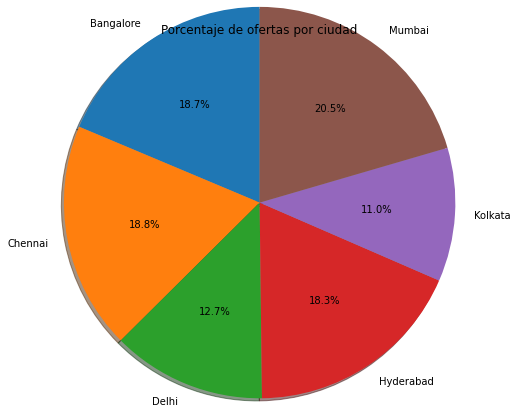

In [ ]:
df['count'] = 1
DD = df.groupby(['City']).count()['count']
plt.figure(figsize=(12,6))
plt.pie(DD.values, labels=DD.index, startangle=90, autopct='%1.1f%%', shadow=True, radius=1.5)
plt.title("Porcentaje de ofertas por ciudad")
plt.minorticks_on()
plt.grid()

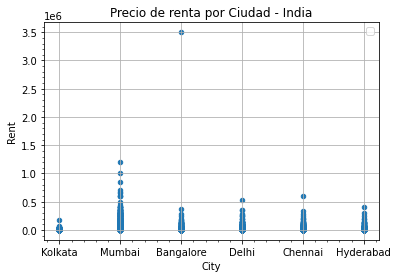

In [ ]:
df.plot(kind='scatter', x='City', y='Rent')
plt.title("Precio de renta por Ciudad - India")
plt.legend()
plt.minorticks_on()
plt.grid()

¿La cantidad de oferta-demanda en una ciudad afecta el precio de las viviendas? 
¿Qué tan variante para el precio la Zona/Ciudad en la que se encuentra?

En los graficos podemos visualizar una gran cantidad de ofertas de viviendas en las ciudades como Mumbai, Chennai, Bangalore y Hyderabad. Las cuales rondan casi por la misma cantidad de ofertas de dichas viviendas.
Sin embargo al visualizar el precio de la renta podemos visualizar que hay una dominancia en la parte alta de precio de renta en la ciudad de Mumbai, sacando de lado un inusual en la ciudad de Bangalore, podemos concluir que la comparativa de oferta-demanda no es un factor razonable para este dataset debido a que efectivamente Mumbai es la zona con mas ofertas y, ademas, es la zona con la renta mas alta, consecuentemente nos lleva a indagar mas otros factores comparables para buscar razones del precio.
El gráfico de los precios de renta tambien nos ayuda tener una noción de los precios puntuales de cada zona, la cual nos genera mas cuestionamientos de la causalidad de los precios, tales como si en una zona céntrica (efectivamente Mumbai lo es), los precios de renta son mayores a comparación de las demas ciudades del dataset. Habría que investigar mas razones por la cuales el precio se eleva mucho o no en cada una de las ciudades.

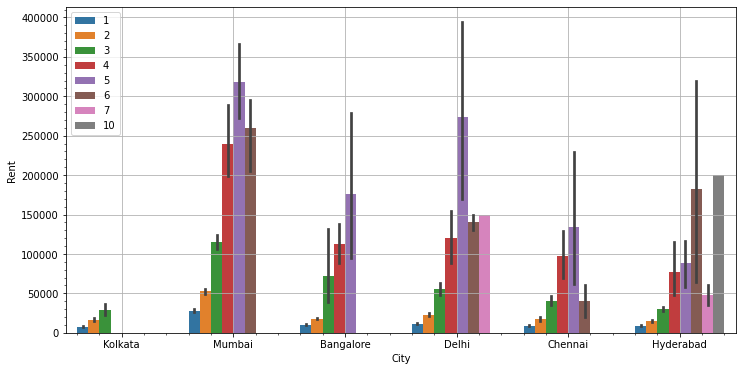

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='City',y='Rent',hue='Bathroom',data=df)
plt.legend()
plt.minorticks_on()
plt.grid()

¿Qué tanto afecta el precio la cantidad de baños que posee una vivienda?

En este gráfico podemos visualizar la comparativa de las Ciudades con la cantidad de baños y su relacion con los precios, en el que concluimos a través de la visualización en cómo los precios de los mismos se disparan en los gráficos de todas las ciudades cuando la vivienda cuenta con mas de 3 baños por vivienda. Lo normal o los precios mas bajos los podemos visualizar en las viviendas con 2 baños o menos.
Entonces afirmamos que los baños son un factor que hacen variar los precios de las viviendas y los mismos se diferencian demasiado a partir de los 2/3 baños por vivienda.

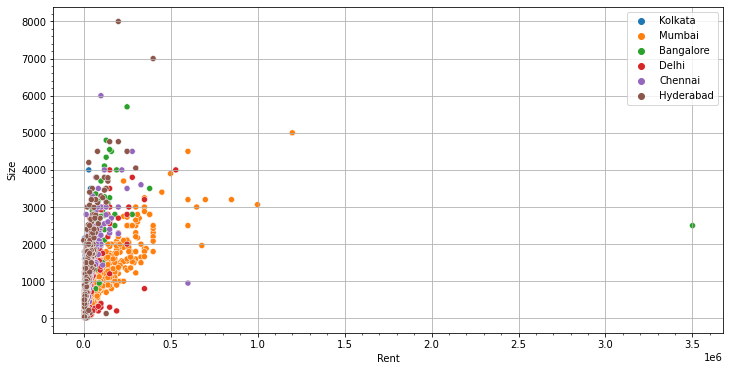

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.scatterplot(x='Rent', y='Size',hue='City',data=df)
plt.legend()
plt.minorticks_on()
plt.grid()

¿Qué tanto afecta al precio el tamaño de la vivienda?

En el siguiente grafico vemos la relación entre el tamaño y el precio de la vivienda diferenciado por las ciudades. Podemos visualizar que los precios mas alejados corresponden a las ciudades mas caras y que, ademas, tenemos los tamaños de casas mas espaciosas, que permiten ver preponderancia de Mumbai donde cuentan con una tendencia de viviendas mas espaciosas, por ende es razonable nuevamente que visualizemos cierta tendencia alcista en cuanto a los precios de las viviendas, y podemos afirmar que efectivamente el tamaño de la  vivienda es un factor determinante para el precio de la misma y permitiendo justificar la incógnita previa del por qué Mumbai presenta dominancia, en efecto una de las causalidades es que cuenta con las viviendas de mayor tamaño en potecial demanda de la misma.

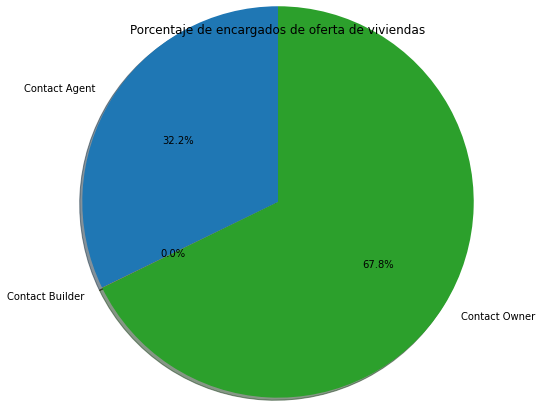

In [ ]:
df['count'] = 1
D = df.groupby(['Point of Contact']).count()['count']
plt.figure(figsize=(12,6))
plt.pie(D.values, labels=D.index, startangle=90, autopct='%1.1f%%', shadow=True, radius=1.5)
plt.title("Porcentaje de encargados de oferta de viviendas")
plt.minorticks_on()
plt.grid()

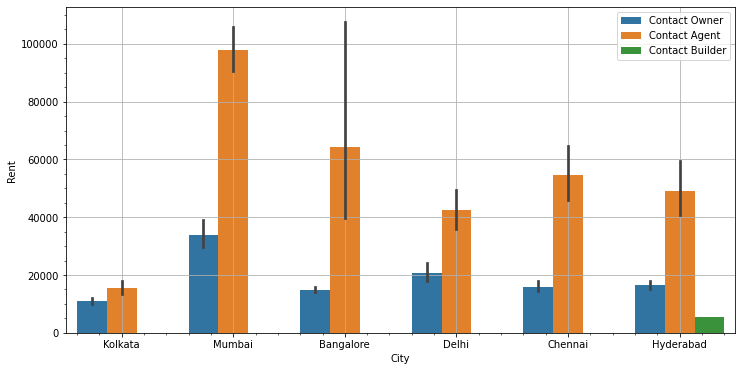

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='City',y='Rent',hue='Point of Contact',data=df)
plt.legend()
plt.minorticks_on()
plt.grid()

¿El hecho del contacto de la vivienda sea dueño directo o inmobiliaria cambia el precio?

Efectivamente a través del gráfico podemos visualizar el hecho de que si la vivienda es ofrecida por el agente inmobiliario, el precio se vuelve mas elevado, y confirmamos que siempre es mas barato contactar con el dueño directo de la vivienda para ahorrarse dinero.

En este gráfico encontramos un inusual en Hyderabad, el cual se debe a que hay una constructora que ofrece viviendas con terminaciones en proceso, siendo esta una razón para encontrar precios de viviendas aún más bajos que si son ofrecidas por el dueño directo.

#***Reducción de dimensionalidad***

Convirtamos estos datos sin procesar en un marco de datos que incluya la variable de destino y los datos reales junto con los nombres de las funciones.

In [ ]:
# Separamos el dataframe en la matriz de características (variables independientes, variables de entrada)
# Y en la variable objetivo (variable independiente, variable de salida)

X = df.drop(["Rent","Area Locality","Furnishing Status","Tenant Preferred", "count"], axis = 1)      # feature matrix
y = df["Rent"]         # target feature

In [ ]:
#Convertimos las variables categóricas a numéricas para poder realizar la reducción de dimensionalidad
X=pd.get_dummies(X, columns=None)

In [ ]:
X.head()

,BHK,Size,Bathroom,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 13,Floor_1 out of 14,...,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
Posted On,,,,,,,,,,,,,,,,,,,,,
18/05/2022,2,1100,2,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
13/05/2022,2,800,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
16/05/2022,2,1000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
04/07/2022,2,800,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
09/05/2022,2,850,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
y.head()

Posted On
18/05/2022    10000
13/05/2022    20000
16/05/2022    17000
04/07/2022    10000
09/05/2022     7500
Name: Rent, dtype: int64

## Implementacion usando funciones de Python


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.manifold import MDS
# Sequential Forward Selection(sfs)
sfs = SFS (MDS(X),
          k_features=5,
          forward=True,
          floating=False,
          scoring='r2',
          cv = 2)

La función SequentialFeatureSelector() acepta los siguientes argumentos principales:

MDS() es un estimador de todo el proceso. El escalado multidimensional (MDS) busca una representación de baja dimensión de los datos en la que las distancias respeten bien las distancias en el espacio original de alta dimensión. 

k_features indica el número de características que se seleccionarán. Puede ser cualquier valor aleatorio, pero el valor óptimo se puede encontrar analizando y visualizando las puntuaciones para diferentes números de características.

argumentos hacia adelante y flotantes forward = Verdadero y floating = Falso son para la técnica de selección hacia adelante.

El argumento de puntuación especifica el criterio de evaluación que se utilizará. Para problemas de regresión, solo hay una puntuación  r2  en la implementación predeterminada. De manera similar, para la clasificación, puede ser exactitud, precisión, recuperación, puntaje f1, etc.

El argumento cv es para la validación cruzada usando k-fold.

In [ ]:
sfs.fit(X,y)
sfs.k_feature_names_     #Lista final de features

('BHK', 'Size', 'Bathroom', 'Floor_1', 'Floor_1 out of 1')

## Backward selection


Realizamos el proceso de selección de características basado en un algoritmo de eliminación hacia atrás hasta tener el conjunto final de características importantes.

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

['Size',
 'Bathroom',
 'Floor_10 out of 16',
 'Floor_11 out of 11',
 'Floor_11 out of 12',
 'Floor_11 out of 27',
 'Floor_12 out of 13',
 'Floor_14 out of 48',
 'Floor_15 out of 31',
 'Floor_17 out of 31',
 'Floor_18 out of 20',
 'Floor_18 out of 29',
 'Floor_18 out of 45',
 'Floor_19 out of 25',
 'Floor_19 out of 33',
 'Floor_19 out of 85',
 'Floor_20 out of 41',
 'Floor_24 out of 24',
 'Floor_25 out of 48',
 'Floor_34 out of 46',
 'Floor_36 out of 81',
 'Floor_39 out of 60',
 'Floor_4 out of 15',
 'Floor_4 out of 4',
 'Floor_40 out of 50',
 'Floor_43 out of 78',
 'Floor_44 out of 75',
 'Floor_45 out of 60',
 'Floor_47 out of 89',
 'Floor_5 out of 12',
 'Floor_5 out of 13',
 'Floor_5 out of 15',
 'Floor_50 out of 75',
 'Floor_53 out of 78',
 'Floor_65 out of 76',
 'Floor_65 out of 78',
 'Floor_7 out of 20',
 'Floor_76 out of 78',
 'Floor_8 out of 10',
 'Floor_8 out of 23',
 'Floor_8 out of 27',
 'Floor_9 out of 31',
 'Floor_Upper Basement out of 20',
 'City_Bangalore',
 'City_Chennai'

Realizamos una serie de evaluaciones con distintos modelos en donde podemos observar qué tan bien explican las características seleccionadas los datos del modelo. Para ello, podemos observar los valores del r2.

In [ ]:
model1 = sm.OLS(y, sm.add_constant(X['Size'])).fit()
model2 = sm.OLS(y, sm.add_constant(X['Point of Contact_Contact Owner'])).fit()
print(model1.pvalues)
print(model2.pvalues)

const     4.011535e-14
Size     1.690873e-195
dtype: float64
const                             4.656358e-290
Point of Contact_Contact Owner    2.300513e-128
dtype: float64


In [ ]:
model1 = sm.OLS(y, sm.add_constant(X[['Size', 'Point of Contact_Contact Agent']])).fit()
model2 = sm.OLS(y, sm.add_constant(X[['Bathroom', 'Point of Contact_Contact Owner']])).fit()
print(model1.pvalues)
print(model2.pvalues)

const                              1.322561e-31
Size                              1.301113e-154
Point of Contact_Contact Agent     1.218470e-87
dtype: float64
const                              1.813837e-01
Bathroom                          4.380725e-155
Point of Contact_Contact Owner     4.882791e-58
dtype: float64


In [ ]:
model3 = sm.OLS(y, sm.add_constant(X[['Floor_10 out of 16',
 'Floor_11 out of 11',
 'Floor_11 out of 12',
 'Floor_11 out of 27',
 'Floor_12 out of 13',
 'Floor_14 out of 48',
 'Floor_15 out of 31',
 'Floor_17 out of 31',
 'Floor_18 out of 20',
 'Floor_18 out of 29',
 'Floor_18 out of 45',
 'Floor_19 out of 25',
 'Floor_19 out of 33',
 'Floor_19 out of 85',
 'Floor_20 out of 41',
 'Floor_24 out of 24',
 'Floor_25 out of 48',
 'Floor_34 out of 46',
 'Floor_36 out of 81',
 'Floor_39 out of 60',
 'Floor_4 out of 15',
 'Floor_4 out of 4',
 'Floor_40 out of 50',
 'Floor_43 out of 78',
 'Floor_44 out of 75',
 'Floor_45 out of 60',
 'Floor_47 out of 89',
 'Floor_5 out of 12',
 'Floor_5 out of 13',
 'Floor_5 out of 15',
 'Floor_50 out of 75',
 'Floor_53 out of 78',
 'Floor_65 out of 76',
 'Floor_65 out of 78',
 'Floor_7 out of 20',
 'Floor_76 out of 78',
 'Floor_8 out of 10',
 'Floor_8 out of 23',
 'Floor_8 out of 27',
 'Floor_9 out of 31',
 'Floor_Upper Basement out of 20']])).fit()
print(model3.pvalues)

const                             1.372507e-173
Floor_10 out of 16                 2.763187e-06
Floor_11 out of 11                 1.625114e-04
Floor_11 out of 12                 3.892031e-03
Floor_11 out of 27                 1.463584e-04
Floor_12 out of 13                 2.555204e-04
Floor_14 out of 48                 1.625114e-04
Floor_15 out of 31                 7.811857e-06
Floor_17 out of 31                 4.645570e-04
Floor_18 out of 20                 1.730858e-10
Floor_18 out of 29                 8.041879e-04
Floor_18 out of 45                 2.760753e-41
Floor_19 out of 25                 2.130640e-03
Floor_19 out of 33                 9.191172e-05
Floor_19 out of 85                 7.811857e-06
Floor_20 out of 41                 2.781019e-05
Floor_24 out of 24                 9.733116e-21
Floor_25 out of 48                 8.041879e-04
Floor_34 out of 46                 2.356912e-07
Floor_36 out of 81                 1.011241e-06
Floor_39 out of 60                 7.811

In [ ]:
model4 = sm.OLS(y, sm.add_constant(X[['Size',
 'Bathroom',
 'Floor_10 out of 16',
 'Floor_11 out of 11',
 'Floor_11 out of 12',
 'Floor_11 out of 27',
 'Floor_12 out of 13',
 'Floor_14 out of 48',
 'Floor_15 out of 31',
 'Floor_17 out of 31',
 'Floor_18 out of 20',
 'Floor_18 out of 29',
 'Floor_18 out of 45',
 'Floor_19 out of 25',
 'Floor_19 out of 33',
 'Floor_19 out of 85',
 'Floor_20 out of 41',
 'Floor_24 out of 24',
 'Floor_25 out of 48',
 'Floor_34 out of 46',
 'Floor_36 out of 81',
 'Floor_39 out of 60',
 'Floor_4 out of 15',
 'Floor_4 out of 4',
 'Floor_40 out of 50',
 'Floor_43 out of 78',
 'Floor_44 out of 75',
 'Floor_45 out of 60',
 'Floor_47 out of 89',
 'Floor_5 out of 12',
 'Floor_5 out of 13',
 'Floor_5 out of 15',
 'Floor_50 out of 75',
 'Floor_53 out of 78',
 'Floor_65 out of 76',
 'Floor_65 out of 78',
 'Floor_7 out of 20',
 'Floor_76 out of 78',
 'Floor_8 out of 10',
 'Floor_8 out of 23',
 'Floor_8 out of 27',
 'Floor_9 out of 31',
 'Floor_Upper Basement out of 20',
 'City_Bangalore',
 'City_Chennai',
 'City_Hyderabad',
 'City_Kolkata',
 'City_Mumbai',
 'Point of Contact_Contact Owner']])).fit()
print(model4.pvalues)

const                             3.965864e-04
Size                              8.539315e-55
Bathroom                          1.124434e-10
Floor_10 out of 16                1.433366e-03
Floor_11 out of 11                4.744963e-03
Floor_11 out of 12                3.967037e-02
Floor_11 out of 27                4.416607e-03
Floor_12 out of 13                9.275375e-03
Floor_14 out of 48                1.246991e-02
Floor_15 out of 31                6.320086e-04
Floor_17 out of 31                5.226008e-03
Floor_18 out of 20                7.814782e-09
Floor_18 out of 29                9.423562e-03
Floor_18 out of 45                5.953168e-41
Floor_19 out of 25                2.157240e-02
Floor_19 out of 33                2.596300e-02
Floor_19 out of 85                4.742903e-05
Floor_20 out of 41                1.244158e-04
Floor_24 out of 24                1.742726e-17
Floor_25 out of 48                1.045131e-02
Floor_34 out of 46                3.835959e-05
Floor_36 out 

In [ ]:
model1.rsquared_adj

0.23676075287053433

In [ ]:
model2.rsquared_adj

0.23697670302168738

In [ ]:
model3.rsquared_adj

0.16645367242923192

In [ ]:
model4.rsquared_adj

0.3896847067379956

Podemos concluir al observar el r2 ajustado que a medida que probamos el modelo con más características la fidelidad del mismo mejora, pero en el Modelo 3 podemos notar que a medida que aumentan aún más las características el r2 empeora. Utilizando las características más importantes obtenidas con la reducción de dimensionalidad pudimos obtener un r2 del 39% aproximadamente en el Modelo 4. Seguramente la data utilizada no tiene una distribución lineal, sino una más compleja, y ajustando el modelo de regresión utilizado podríamos llegar a alcanzar mejores resultados de r2 deduciendo que se explican mejor los datos.

#***Metricas algoritmos de clasificación***

In [ ]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

Realizamos el entrenamiento de nuestros datos y luego obetnemos las prediciones del modelo. Utilizamos un gráfico de confusión para visualizar el desempeño del algoritmo

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = pd.get_dummies(df.drop(["Point of Contact", "count"], axis = 1), columns=None)      # feature matrix
y = df["Point of Contact"]         # target feature
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

<Figure size 720x432 with 0 Axes>

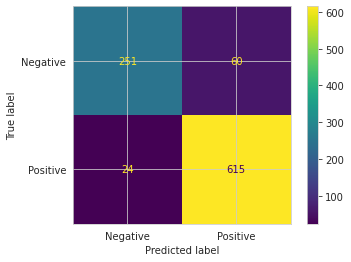

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([251,  60,  24, 615])

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.911578947368421

In [ ]:
(615+251) / (615+24+60+251)

0.911578947368421

In [ ]:
# Precision se puede evaluar para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label='Contact Agent')
precision_negativa = metrics.precision_score(y_test, preds, pos_label='Contact Owner')
precision_positiva, precision_negativa 

(0.9127272727272727, 0.9111111111111111)

In [ ]:
# Recall se puede evaluar para cada categoria
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label='Contact Agent')
recall_especificidad= metrics.recall_score(y_test, preds, pos_label='Contact Owner')
recall_sensibilidad, recall_especificidad

(0.8070739549839229, 0.9624413145539906)

In [ ]:
# F1 se puede evaluar para cada categoria
f1_positivo = metrics.f1_score(y_test, preds, pos_label='Contact Agent')
f1_negativo = metrics.f1_score(y_test, preds, pos_label='Contact Owner')
f1_positivo, f1_negativo 

(0.856655290102389, 0.9360730593607306)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

               precision    recall  f1-score   support

Contact Agent       0.91      0.81      0.86       311
Contact Owner       0.91      0.96      0.94       639

     accuracy                           0.91       950
    macro avg       0.91      0.88      0.90       950
 weighted avg       0.91      0.91      0.91       950



Al realizar una evaluación del desempeño de nuestro algoritmo pudimos ver qué tipos de aciertos y errores tuvo nuestro modelo, logrando una exactitud (accuracy) del 91% total de elementos clasificados correctamente.
En términos de aciertos y errores, el algoritmo apenas obtuvo 24 falsos positivos, y 60 falsos negativos, mientras que logró alcanzar 615 verdaderos positivos y 251 verdaderos negativos.

Podemos concluir al observar el F1-Score, y los altos valores de precisión y recall que el modelo maneja muy bien esa clase.
